In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from scipy.stats import t, f
from sklearn.model_selection import train_test_split
from scipy.stats import chi2
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Research Questions
1) To what extent does a strong relationship exist between tempo and genre of music?

2) What is likely one of the best combinations of independent variables for predicting genre?

3) Does a classification model better at pedicting the genre with all independent variables or the selected ideal combination based on question 2 

Question 1: bar graph, box plot, Anova Testing

Question 2: correlation table: selecting top 5 correlated variables and running either backwards or forwards selection to figure out a parsimonous model/ideal cmombination for predicting genre

Question 3: Pick a classification algorithm and figure out whether the parsimonious model combo or all variables are better for selecting genre

In [3]:
df = pd.read_csv('data.csv')

In [4]:
#determined no null values
for i in df.columns:
    print(df[i].unique())

['blues.00081.au' 'blues.00022.au' 'blues.00031.au' 'blues.00012.au'
 'blues.00056.au' 'blues.00058.au' 'blues.00066.au' 'blues.00060.au'
 'blues.00025.au' 'blues.00014.au' 'blues.00093.au' 'blues.00097.au'
 'blues.00040.au' 'blues.00096.au' 'blues.00095.au' 'blues.00068.au'
 'blues.00071.au' 'blues.00080.au' 'blues.00094.au' 'blues.00029.au'
 'blues.00067.au' 'blues.00033.au' 'blues.00001.au' 'blues.00098.au'
 'blues.00087.au' 'blues.00083.au' 'blues.00055.au' 'blues.00077.au'
 'blues.00076.au' 'blues.00049.au' 'blues.00011.au' 'blues.00048.au'
 'blues.00053.au' 'blues.00064.au' 'blues.00051.au' 'blues.00013.au'
 'blues.00045.au' 'blues.00075.au' 'blues.00082.au' 'blues.00091.au'
 'blues.00035.au' 'blues.00057.au' 'blues.00016.au' 'blues.00037.au'
 'blues.00050.au' 'blues.00046.au' 'blues.00002.au' 'blues.00038.au'
 'blues.00006.au' 'blues.00003.au' 'blues.00043.au' 'blues.00092.au'
 'blues.00034.au' 'blues.00005.au' 'blues.00069.au' 'blues.00023.au'
 'blues.00086.au' 'blues.00008.au'

[-1.50501041e+01 -1.34902650e+01 -2.63479562e+01 -1.78881539e+01
 -7.98559290e+00 -2.02336344e+01 -1.46428840e+01 -1.31311449e+01
  1.41917471e+00 -7.02174678e+00  4.73510644e+00 -1.15126613e+01
 -1.71636414e+01 -6.39160067e+00 -1.65326656e+01 -1.12076158e+01
 -1.38659572e+01 -9.62992377e+00 -4.57233021e+00 -2.22787878e+01
 -1.27875797e+01 -2.45056313e+01 -1.01036164e+01 -1.09092201e+01
 -1.19204678e+01 -1.14053387e+01 -1.15813657e+01 -1.29535635e+01
 -1.22578289e+01 -8.69432712e+00  7.84048866e-01 -1.33140683e+01
 -1.13849386e+01 -1.48203386e+01 -9.74589198e+00 -2.15541930e+01
 -1.31607389e+01 -1.49754206e+01 -1.76041267e+01 -4.95927151e-01
 -2.23529874e+01 -8.20914608e+00 -1.49780444e+01 -1.07087484e+01
 -1.12131776e+01 -1.37819907e+01 -1.17805889e+01 -1.69770548e+01
 -6.48975973e+00 -7.57741166e-01 -1.65759615e+01 -3.84662723e+00
 -2.72095400e+01 -8.58348373e+00 -1.77981669e+01 -7.60911270e+00
 -8.73510063e+00 -1.18305025e+01 -1.72341606e+01 -1.13569082e+01
 -1.58809797e+01 -1.09361

In [5]:
df.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [4]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


## Question 1: To what extent does a strong relationship exist between tempo and genre of music?

###### Box plot of tempos for each genre

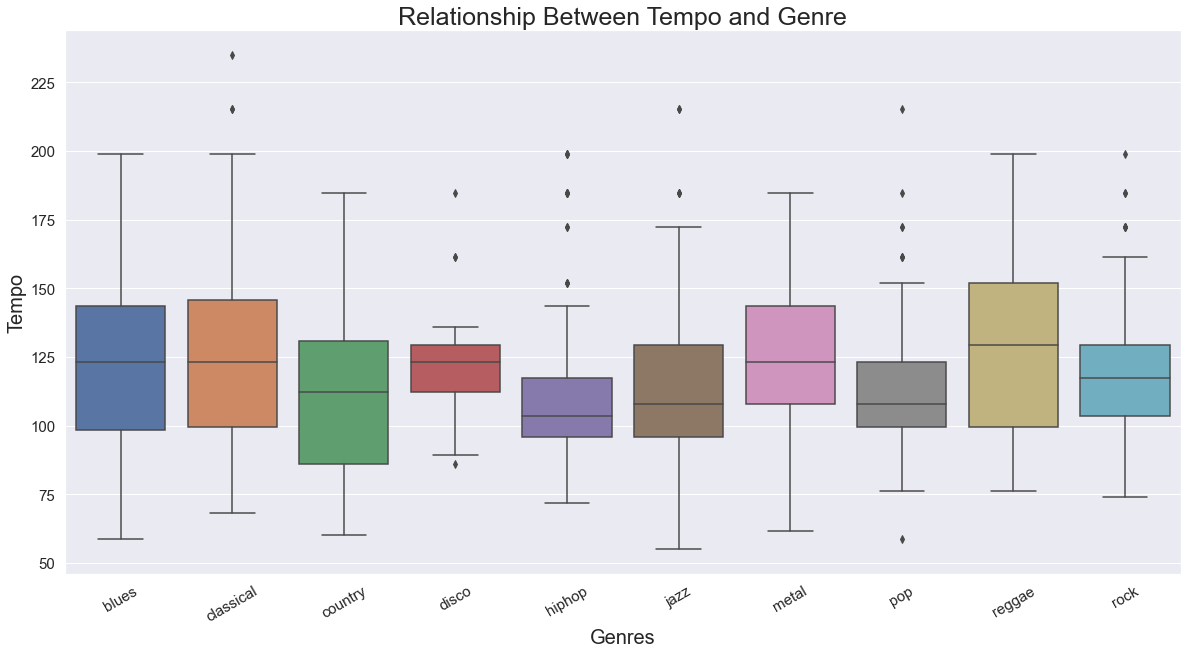

In [23]:
sns.boxplot(x = 'label', y = 'tempo', data = df)
sns.set(rc = {'figure.figsize':(20,15)})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(rotation = 30)
plt.xlabel("Genres", fontsize = 20)
plt.ylabel("Tempo", fontsize = 20)
plt.title("Relationship Between Tempo and Genre", fontsize = 25)

plt.show()

###### Bar Graph of Average Tempo for each genre

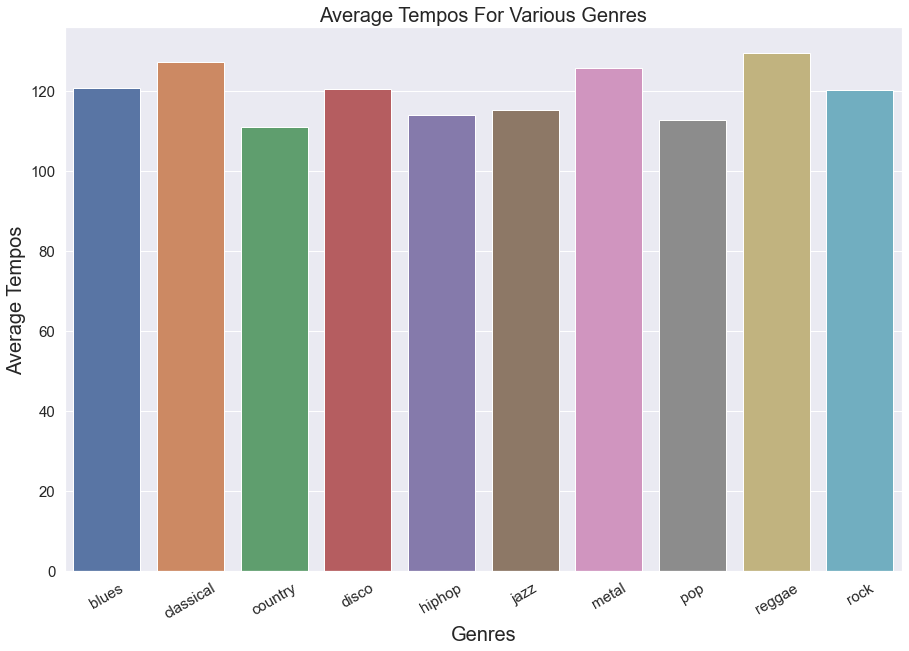

In [27]:
averages = []
for i in df.label.unique():
    averages.append(df.tempo[df.label == i].mean())

sns.barplot(x = df.label.unique(), y = averages)
sns.set(rc = {'figure.figsize':(20,15)})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(rotation = 30)
plt.title('Average Tempos For Various Genres', fontsize = 20)
plt.xlabel('Genres', fontsize = 20)
plt.ylabel('Average Tempos', fontsize = 20)

plt.show()

###### Association Between Tempo and Genre with ANOVA

Next, we would like to use Anova testing to determine if, for all western music, does there exist an association between the tempo and the 10 listed genres. Specifically, we would like to test this association by assessing if we have enough evidence to suggest that at least two genres average tempos are different from each other. The averages that we are considering in this case will be

* $\mu_{blues}$ = the average tempo of *all* blues compositions
* $\mu_{classical}$ = the average tempo of *all* classical compositions
* $\mu_{country}$ = the average tempo of *all* country compositions
* $\mu_{disco}$ = the average tempo of *all* disco compositions
* $\mu_{hiphop}$ = the average tempo of *all* hiphop compositions
* $\mu_{jazz}$ = the average tempo of *all* jazz compositions
* $\mu_{metal}$ = the average tempo of *all* metal compositions
* $\mu_{pop}$ = the average tempo of *all* pop compositions
* $\mu_{reggae}$ = the average tempo of *all* reggae compositions
* $\mu_{rock}$ = the average tempo of *all* rock compositions


$H_0$:  𝜇𝑊𝑎𝑙𝑙𝑖𝑛𝑔𝑓𝑜𝑟𝑑 = 𝜇𝑀𝑖𝑛𝑜𝑟 = 𝜇𝐵𝑒𝑙𝑙𝑡𝑜𝑤𝑛 = 𝜇𝐵𝑟𝑜𝑎𝑑𝑤𝑎𝑦 = 𝜇𝐹𝑟𝑒𝑚𝑜𝑛𝑡

$H_A$: At least one of the genre tempo averages does not = each other

In [7]:
results = smf.ols('tempo~label', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     5.249
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           5.26e-07
Time:                        07:26:23   Log-Likelihood:                -4737.9
No. Observations:                1000   AIC:                             9496.
Df Residuals:                     990   BIC:                             9545.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            120.7422      2.777     43.478      0.000     115.293     126.192
label[T.classical]     6.2901      3.927      1.602      0.110      -1.417      13.997
label[T.country]      -9.8834      3.927     -2.517      0.012     -17.590      -2.176
label[T.disco]        -0.4004      3.927     -0.102      0.919      -8.107       7.307
label[T.hiphop]       -6.7659      3.927     -1.723      0.085     -14.473       0.941
label[T.jazz]         -5.6741      3.927     -1.445      0.149     -13.381       2.033
label[T.metal]         4.8687      3.927      1.240      0.215      -2.838      12.576
label[T.pop]          -7.9822      3.927     -2.032      0.042     -15.689      -0.275
label[T.reggae]        8.6220      3.927      2.195      0.028       0.915      16.329
label[T.rock]         -0.4798      3.927     -0.122      0.903      -8.187       7.227
==============================================================================
Omnibus:                       71.375   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.166
Skew:                           0.638   Prob(JB):                     4.34e-20
Kurtosis:                       3.716   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using a significance level of $\alpha=0.05$

Since the p value (5.26 x $10^{-7}$: Prob(F-statistic)) is below $\alpha$, we can reject the null hypothesis and conclude that it is highly likely that differences in averages did not occur due to chance, and that the average tempo of each of the 10 genres is not the same. In other words, it is very likely that there exists an association between tempo and genre.

Conclusion - Although, it is evident that the average tempos are not equal for all the genres and there exists an association (based on the anova test), there is still not a strong association. We have made this conclusion because the R squared value is quite low (absolute value close to 0). The higher (closer to 1 or -1) the absolute value of R squared, the stronger the association.

In [8]:
type(df.columns)

pandas.core.indexes.base.Index

## Question 2 - Feature Selection (Through Recursive Feature Selection): Which top 5 independent variables/features are the best for predicting genre of music composition

In [9]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
X = df.drop(columns=['filename', 'label'])
y = df.label
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X, y)
print(rfe.support_)
print(X.columns)

[False False  True  True False  True False False  True False False  True
 False False False False False False False False False False False False
 False False False False]
Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')


3, 4, 6, 8, 12
Based on RFE model, "chroma_stft", "rmse", "spectral_bandwidth", "mfcc1", "mfcc4" are the 5 best independent variables to use to predict from the 10 given genres of music compositions.

# Question 3: Are using all features or top 5 features the best way to classify genre of a music composition

###### Visualization of data using pairplot to determine which machine learning algorithm will work the best for classification
Decision Tree: Not a lot of overlap
Random Forest: If a lot of overlap

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from itertools import repeat
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
#using all independent variables
# Creating Random Forest Classifier Model and running it 30 times for greater accuracy 
predictions = 0
avg_score = 0.0
ntimes = 30
clf = 0
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0, n_estimators = 40)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
print(avg_score)

# Creating confusion matrix and assigning it to "array"
array_all = pd.crosstab(y_test, predictions, rownames = ['Actual result'], colnames = ['Predicted Result'])


# Picking list of x axes labels of heat map
actual_result = df.label.unique()
# Picking list of y axes labels of heat map
predicted_result = df.label.unique()
#Printing confusion matrix
array_all

0.6210000000000001


Predicted Result,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Actual result,,,,,,,,,,
blues,15,0,2,0,0,3,2,0,0,2
classical,0,21,0,0,0,0,0,0,0,0
country,0,0,16,0,1,1,1,0,0,1
disco,0,1,0,9,4,0,0,2,1,2
hiphop,1,0,0,1,8,0,1,1,3,2
jazz,1,3,1,1,1,15,0,1,0,0
metal,1,0,0,0,3,0,14,0,1,2
pop,1,0,1,2,2,2,0,16,1,1
reggae,0,0,3,0,2,1,1,0,4,0


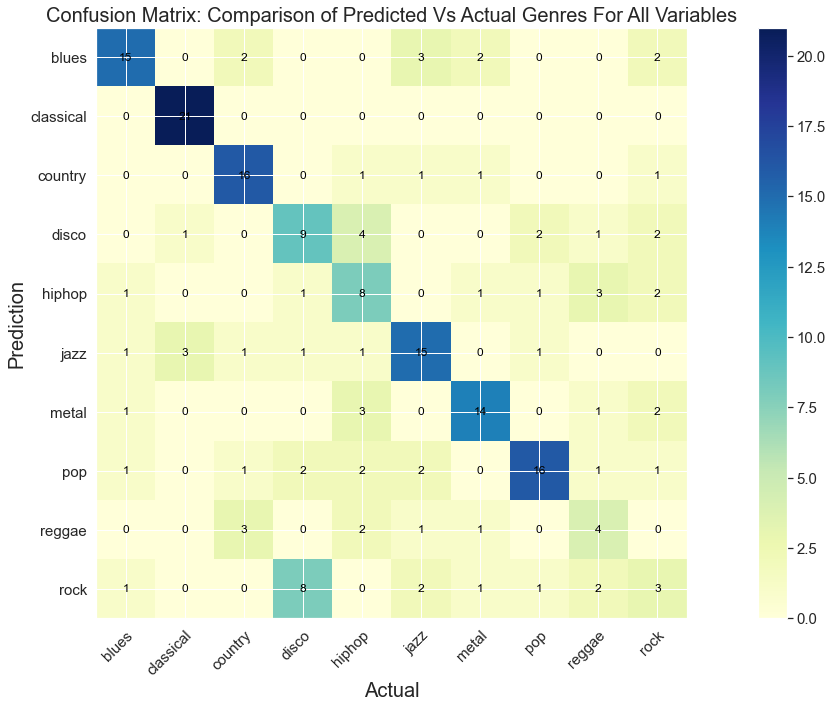

In [12]:
# Converting confusion matrix dataframe to an array
confusion_matrix = np.array(array_all)
confusion_matrix
# Code for printing heat map
fig, ax = plt.subplots()
# Inputting 2D array: confusion_matrix(converted from dataframe to array) into design for heat map
im = ax.imshow(array_all, cmap = 'YlGnBu')
#im = ax.imshow(confusion_matrix, cmap = 'Greens')
#im = ax.imshow(confusion_matrix, cmap = 'Cool')
cbar = plt.colorbar(im)
tick_font_size = 15
cbar.ax.tick_params(labelsize = tick_font_size)

# Ticks for x and y axis
ax.set_xticks(np.arange(len(predicted_result)))
ax.set_yticks(np.arange(len(actual_result)))

# Assigning x and y axes labels of heat map
ax.set_xticklabels(actual_result)
ax.set_yticklabels(predicted_result)
# Rotate the tick labels and set their alignment (for a better visual)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize = 15)
plt.setp(ax.get_yticklabels(), fontsize = 15)
plt.xlabel('Actual', fontsize = 20)
plt.ylabel('Prediction', fontsize = 20)
#plt.figure(figsize=(30,12))

# Putting confusion matrix array values in respective spots of heat map
for i in range(len(actual_result)):
    for j in range(len(predicted_result)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")
# Assigning title for heat map
ax.set_title("Confusion Matrix: Comparison of Predicted Vs Actual Genres For All Variables", fontsize = 20)
fig.tight_layout()


plt.show()

In [13]:
from sklearn.metrics import classification_report
target_names = df.label.unique()
report_all = classification_report(y_test, predictions, target_names = target_names, output_dict=True)
print(report_all)

{'blues': {'precision': 0.75, 'recall': 0.625, 'f1-score': 0.6818181818181818, 'support': 24}, 'classical': {'precision': 0.84, 'recall': 1.0, 'f1-score': 0.9130434782608696, 'support': 21}, 'country': {'precision': 0.6956521739130435, 'recall': 0.8, 'f1-score': 0.7441860465116279, 'support': 20}, 'disco': {'precision': 0.42857142857142855, 'recall': 0.47368421052631576, 'f1-score': 0.45, 'support': 19}, 'hiphop': {'precision': 0.38095238095238093, 'recall': 0.47058823529411764, 'f1-score': 0.42105263157894735, 'support': 17}, 'jazz': {'precision': 0.625, 'recall': 0.6521739130434783, 'f1-score': 0.6382978723404256, 'support': 23}, 'metal': {'precision': 0.7, 'recall': 0.6666666666666666, 'f1-score': 0.6829268292682926, 'support': 21}, 'pop': {'precision': 0.7619047619047619, 'recall': 0.6153846153846154, 'f1-score': 0.6808510638297872, 'support': 26}, 'reggae': {'precision': 0.3333333333333333, 'recall': 0.36363636363636365, 'f1-score': 0.34782608695652173, 'support': 11}, 'rock': {'p

In [14]:
df_dict_all = pd.DataFrame(report_all)
df_dict_all

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock,accuracy,macro avg,weighted avg
precision,0.750000,0.840000,0.695652,0.428571,0.380952,0.625000,0.700000,0.761905,0.333333,0.230769,0.605,0.574618,0.604386
recall,0.625000,1.000000,0.800000,0.473684,0.470588,0.652174,0.666667,0.615385,0.363636,0.166667,0.605,0.583380,0.605000
f1-score,0.681818,0.913043,0.744186,0.450000,0.421053,0.638298,0.682927,0.680851,0.347826,0.193548,0.605,0.575355,0.600818
support,24.000000,21.000000,20.000000,19.000000,17.000000,23.000000,21.000000,26.000000,11.000000,18.000000,0.605,200.000000,200.000000


In [15]:
columns_all = df_dict_all.iloc[0,:10]
columns_all

blues        0.750000
classical    0.840000
country      0.695652
disco        0.428571
hiphop       0.380952
jazz         0.625000
metal        0.700000
pop          0.761905
reggae       0.333333
rock         0.230769
Name: precision, dtype: float64

In [16]:
#using selected 5 independent variables variables
# Creating Random Forest Classifier Model and running it 30 times for greater accuracy 
predictions = 0
avg_score = 0.0
ntimes = 30
clf = 0
X_smaller = X.iloc[:, [2,3,5,7,11]]
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X_smaller, y, test_size=0.2)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0, n_estimators = 40)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
print(avg_score)

# Creating confusion matrix and assigning it to "array"
array_few= pd.crosstab(y_test, predictions, rownames = ['Actual result'], colnames = ['Predicted Result'])

# Picking list of x axes labels of heat map
actual_result = df.label.unique()
# Picking list of y axes labels of heat map
predicted_result = df.label.unique()
#Printing confusion matrix
array_few

0.5470000000000002


Predicted Result,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Actual result,,,,,,,,,,
blues,6,0,5,0,0,2,0,0,0,0
classical,1,14,1,0,0,0,0,0,0,0
country,1,1,7,1,0,2,0,1,3,2
disco,0,0,0,10,4,0,2,2,1,4
hiphop,1,0,1,1,11,2,4,1,3,0
jazz,2,1,2,0,0,9,1,2,0,0
metal,2,0,0,1,1,0,19,0,0,1
pop,0,0,1,1,1,2,0,15,2,0
reggae,2,1,0,1,2,1,2,1,9,1


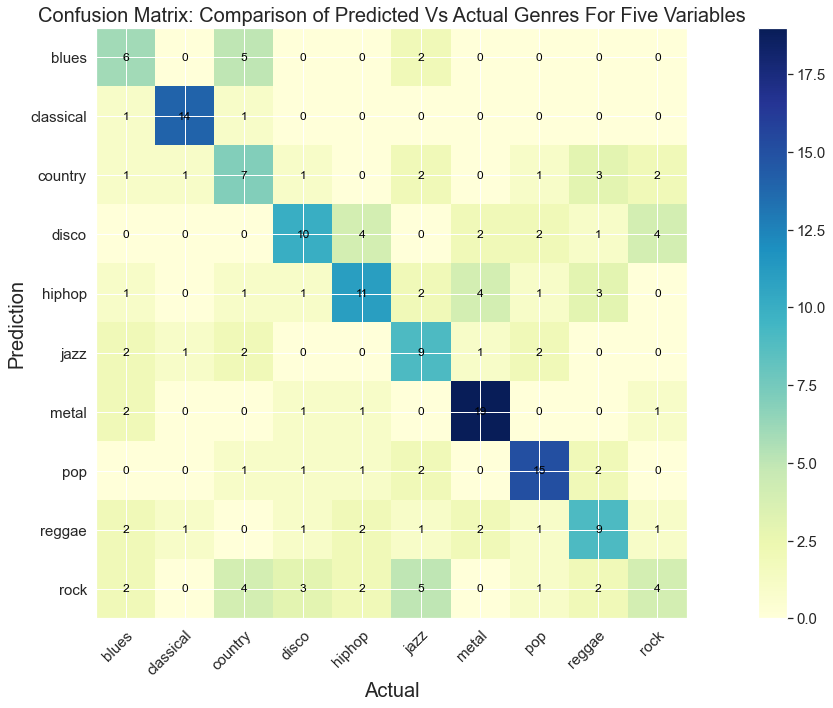

In [17]:
# Converting confusion matrix dataframe to an array
confusion_matrix = np.array(array_few)
confusion_matrix
# Code for printing heat map
fig, ax = plt.subplots()
# Inputting 2D array: confusion_matrix(converted from dataframe to array) into design for heat map
im = ax.imshow(array_few, cmap = 'YlGnBu')
#im = ax.imshow(confusion_matrix, cmap = 'Greens')
#im = ax.imshow(confusion_matrix, cmap = 'Cool')
cbar = plt.colorbar(im)
tick_font_size = 15
cbar.ax.tick_params(labelsize = tick_font_size)

# Ticks for x and y axis
ax.set_xticks(np.arange(len(predicted_result)))
ax.set_yticks(np.arange(len(actual_result)))

# Assigning x and y axes labels of heat map
ax.set_xticklabels(actual_result)
ax.set_yticklabels(predicted_result)
# Rotate the tick labels and set their alignment (for a better visual)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize = 15)
plt.setp(ax.get_yticklabels(), fontsize = 15)
plt.xlabel('Actual', fontsize = 20)
plt.ylabel('Prediction', fontsize = 20)
#plt.figure(figsize=(30,12))

# Putting confusion matrix array values in respective spots of heat map
for i in range(len(actual_result)):
    for j in range(len(predicted_result)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")
# Assigning title for heat map
ax.set_title("Confusion Matrix: Comparison of Predicted Vs Actual Genres For Five Variables", fontsize = 20)
fig.tight_layout()


plt.show()

In [18]:
target_names = df.label.unique()
report_five = classification_report(y_test, predictions, target_names = target_names, output_dict=True)
print(report_five)

{'blues': {'precision': 0.35294117647058826, 'recall': 0.46153846153846156, 'f1-score': 0.4000000000000001, 'support': 13}, 'classical': {'precision': 0.8235294117647058, 'recall': 0.875, 'f1-score': 0.8484848484848485, 'support': 16}, 'country': {'precision': 0.3333333333333333, 'recall': 0.3888888888888889, 'f1-score': 0.358974358974359, 'support': 18}, 'disco': {'precision': 0.5555555555555556, 'recall': 0.43478260869565216, 'f1-score': 0.4878048780487805, 'support': 23}, 'hiphop': {'precision': 0.5238095238095238, 'recall': 0.4583333333333333, 'f1-score': 0.4888888888888889, 'support': 24}, 'jazz': {'precision': 0.391304347826087, 'recall': 0.5294117647058824, 'f1-score': 0.45, 'support': 17}, 'metal': {'precision': 0.6785714285714286, 'recall': 0.7916666666666666, 'f1-score': 0.7307692307692307, 'support': 24}, 'pop': {'precision': 0.6521739130434783, 'recall': 0.6818181818181818, 'f1-score': 0.6666666666666666, 'support': 22}, 'reggae': {'precision': 0.45, 'recall': 0.45, 'f1-sco

In [19]:
df_dict = pd.DataFrame(report_five)
df_dict

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock,accuracy,macro avg,weighted avg
precision,0.352941,0.823529,0.333333,0.555556,0.523810,0.391304,0.678571,0.652174,0.45,0.333333,0.52,0.509455,0.515331
recall,0.461538,0.875000,0.388889,0.434783,0.458333,0.529412,0.791667,0.681818,0.45,0.173913,0.52,0.524535,0.520000
f1-score,0.400000,0.848485,0.358974,0.487805,0.488889,0.450000,0.730769,0.666667,0.45,0.228571,0.52,0.511016,0.511512
support,13.000000,16.000000,18.000000,23.000000,24.000000,17.000000,24.000000,22.000000,20.00,23.000000,0.52,200.000000,200.000000


In [20]:
columns_few = df_dict.iloc[0,:10]
columns_few

blues        0.352941
classical    0.823529
country      0.333333
disco        0.555556
hiphop       0.523810
jazz         0.391304
metal        0.678571
pop          0.652174
reggae       0.450000
rock         0.333333
Name: precision, dtype: float64

In [21]:
type(columns_few)

pandas.core.series.Series

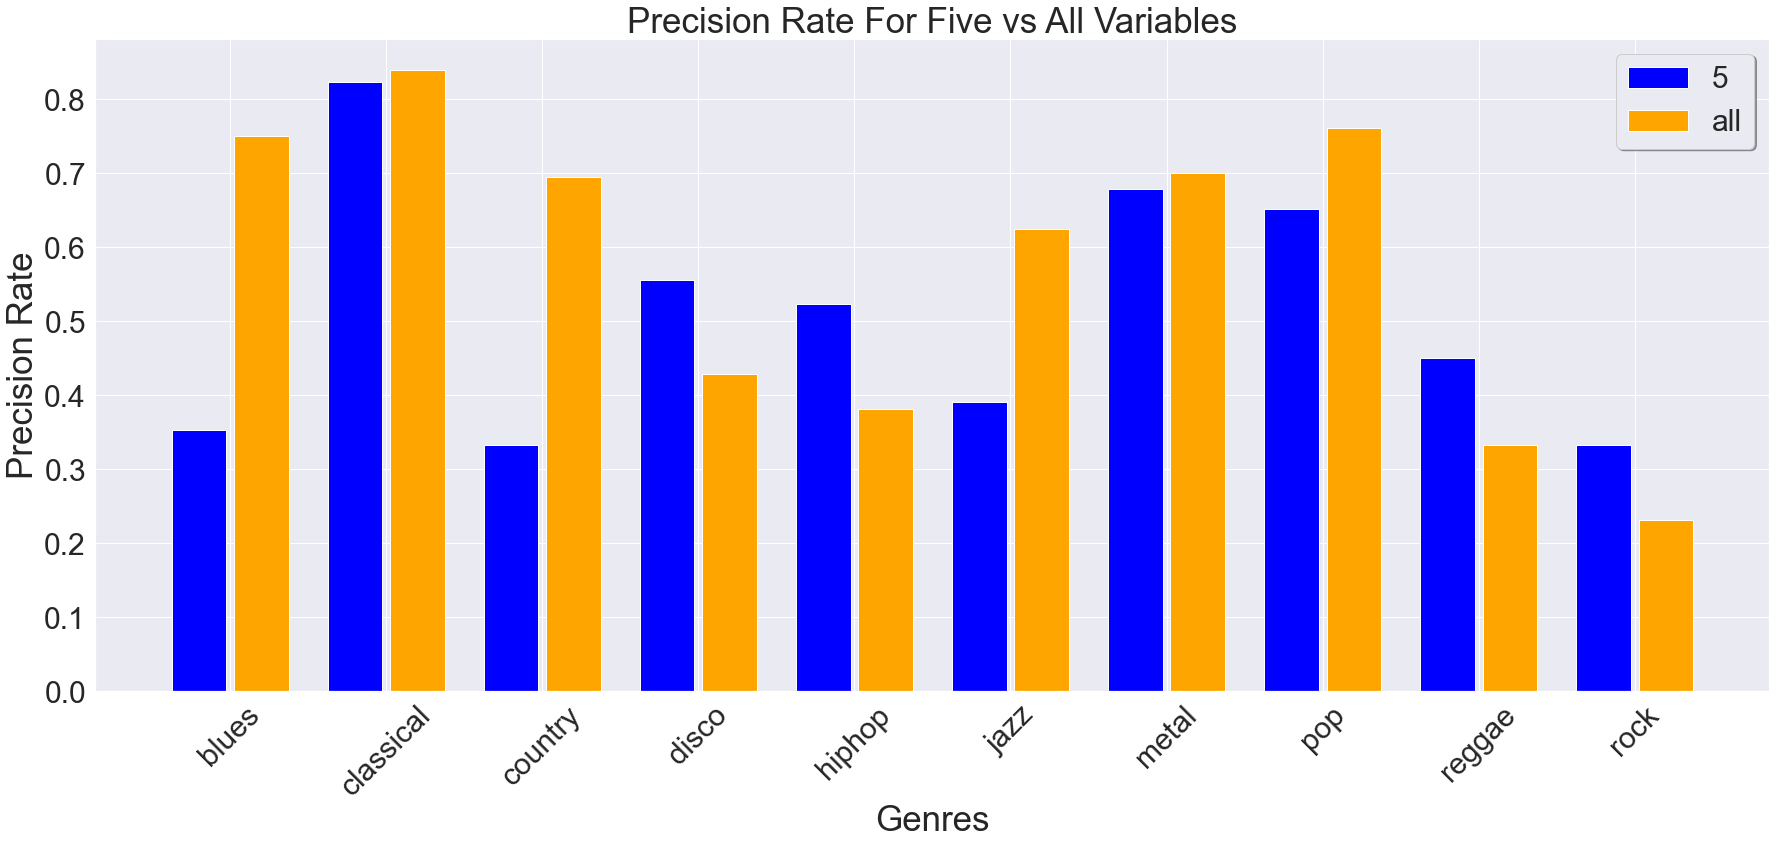

In [29]:
# Assigning x labels for bar graphs (Ranges of cholestrol numbers)
X_labels = df.label.unique()

# Y axis: Finding number of people who did not suffer a heart attack with cholestrol ranges given above
few_var = columns_few

all_var = columns_all

X_axis = np.arange(len(X_labels))

# Setting ideal positions for visual alignment in code for plotting bars
plt.figure(figsize=(30,12))
plt.bar(X_axis - 0.2, few_var, 0.35, label = '5', color = 'blue')
plt.bar(X_axis + 0.2, all_var, 0.35, label = 'all', color = 'orange')


#Setting labels  

plt.xticks(X_axis, X_labels, fontsize = 30)
plt.yticks(fontsize = 30)
plt.xticks(rotation = 45)
plt.xlabel("Genres", fontsize = 35)
plt.ylabel("Precision Rate", fontsize = 35)
plt.title("Precision Rate For Five vs All Variables", fontsize = 35)

plt.legend(fontsize = 30, shadow = True)
plt.show()